# Data analysis of highest  top 1000 highest grossing hollywood films

# Importing all Modules

In [1]:
!pip install plotly==5.5.0
from tqdm import tqdm, notebook
import warnings
warnings.filterwarnings('ignore')
#Importing Python libraries
import numpy as np
import pandas as pd
 #For Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import requests
#For Scraping the Data
from bs4 import BeautifulSoup
from datetime import date,datetime
import re
import time
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'
#For Visualization
import plotly.graph_objects as go
import plotly.express as px
import plotly.offline as py
import gc


# Loading data from csv file into dataframe

In [2]:
df_movies_data=pd.read_csv(("C:/Users/mrjdh/Downloads/Marathon_132_sowjanya/data.csv"))

In [3]:
df_movies_data=pd.DataFrame(df_movies_data)

In [4]:
df_movies_data.dtypes

Unnamed: 0                     int64
Title                         object
Movie Info                    object
Distributor                   object
Release Date                  object
Domestic Sales (in $)          int64
International Sales (in $)     int64
World Sales (in $)             int64
Genre                         object
Movie Runtime                 object
License                       object
dtype: object

In [5]:
df_movies_data.head()

,Unnamed: 0,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License
0,0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,"December 16, 2015",936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13
1,1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,"April 24, 2019",858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13
2,2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,"December 16, 2009",760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13
3,3,Black Panther (2018),"T'Challa, heir to the hidden but advanced king...",Walt Disney Studios Motion Pictures,NaN,700426566,647171407,1347597973,"['Action', 'Adventure', 'Sci-Fi']",2 hr 14 min,NaN
4,4,Avengers: Infinity War (2018),The Avengers and their allies must be willing ...,Walt Disney Studios Motion Pictures,NaN,678815482,1369544272,2048359754,"['Action', 'Adventure', 'Sci-Fi']",2 hr 29 min,NaN


In [6]:
df_movies_data.drop(['Unnamed: 0'],inplace=True,axis=1)

In [7]:
df_movies_data.head()

,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License
0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,"December 16, 2015",936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']",2 hr 18 min,PG-13
1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,"April 24, 2019",858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']",3 hr 1 min,PG-13
2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,"December 16, 2009",760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']",2 hr 42 min,PG-13
3,Black Panther (2018),"T'Challa, heir to the hidden but advanced king...",Walt Disney Studios Motion Pictures,NaN,700426566,647171407,1347597973,"['Action', 'Adventure', 'Sci-Fi']",2 hr 14 min,NaN
4,Avengers: Infinity War (2018),The Avengers and their allies must be willing ...,Walt Disney Studios Motion Pictures,NaN,678815482,1369544272,2048359754,"['Action', 'Adventure', 'Sci-Fi']",2 hr 29 min,NaN


In [8]:
df_movies_data["Movie Runtime"]

0      2 hr 18 min
1       3 hr 1 min
2      2 hr 42 min
3      2 hr 14 min
4      2 hr 29 min
          ...     
913     2 hr 3 min
914    1 hr 22 min
915    2 hr 13 min
916    1 hr 38 min
917    1 hr 42 min
Name: Movie Runtime, Length: 918, dtype: object

In [9]:
df_movies_data['Title']

0      Star Wars: Episode VII - The Force Awakens (2015)
1                               Avengers: Endgame (2019)
2                                          Avatar (2009)
3                                   Black Panther (2018)
4                          Avengers: Infinity War (2018)
                             ...                        
913                                  The Notebook (2004)
914                     Jimmy Neutron: Boy Genius (2001)
915                                 Eat Pray Love (2010)
916                   The Texas Chainsaw Massacre (2003)
917                                     Zookeeper (2011)
Name: Title, Length: 918, dtype: object

# Data Cleaning

In [10]:
df_movies_data=pd.DataFrame(df_movies_data)

In [11]:
df_movies_data.fillna(value = 0, inplace = True)

In [12]:
df_movies_data['Release Date']=pd.to_datetime(df_movies_data['Release Date'])


In [13]:
df_movies_data.dtypes

Title                                 object
Movie Info                            object
Distributor                           object
Release Date                  datetime64[ns]
Domestic Sales (in $)                  int64
International Sales (in $)             int64
World Sales (in $)                     int64
Genre                                 object
Movie Runtime                         object
License                               object
dtype: object

In [14]:
df_movies_data['Movie Runtime']=df_movies_data['Movie Runtime'].apply(lambda x:re.compile('\d+').findall(x))

In [15]:
df_movies_data["Movie Runtime"]

0      [2, 18]
1       [3, 1]
2      [2, 42]
3      [2, 14]
4      [2, 29]
        ...   
913     [2, 3]
914    [1, 22]
915    [2, 13]
916    [1, 38]
917    [1, 42]
Name: Movie Runtime, Length: 918, dtype: object

In [16]:
#df_movies_data['Movie Runtime']=df_movies_data['Movie Runtime'].apply(lambda x:''.join(x))

In [17]:
df_movies_data.isna().sum()

Title                         0
Movie Info                    0
Distributor                   0
Release Date                  0
Domestic Sales (in $)         0
International Sales (in $)    0
World Sales (in $)            0
Genre                         0
Movie Runtime                 0
License                       0
dtype: int64

In [18]:
df_movies_data.dtypes

Title                                 object
Movie Info                            object
Distributor                           object
Release Date                  datetime64[ns]
Domestic Sales (in $)                  int64
International Sales (in $)             int64
World Sales (in $)                     int64
Genre                                 object
Movie Runtime                         object
License                               object
dtype: object

In [19]:

#df_movies_data['Movie Runtime']=df_movies_data['Movie Runtime'].apply(lambda x: int(x[0]) * 60 + int(x[1]))

In [20]:
print([df_movies_data['Movie Runtime'][1]])

[['3', '1']]


In [21]:
#df_movies_data['selected_elements'] = [df_movies_data['Movie Runtime'][index] for index in df_movies_data['Movie Runtime']]

In [22]:
hours = [] 
minutes=[]
hours1=[]
#print((df_movies_data['Movie Runtime']))
for i in range(0,len(df_movies_data['Movie Runtime'])):
    for k in range(0,len(df_movies_data['Movie Runtime'][i])):
         pass
    hours.append((df_movies_data['Movie Runtime'][i]))
#print(hours)
print(len(hours))
#hours1=hours[::1]
#minutes=hours[::2]
#print(hours1)
#print(len(hours))
#print(len(minutes))

918


In [23]:
df_movies_data_1=pd.DataFrame((hours),columns=['hrs','mins'])
df_movies_data_1.head()
df_movies_data_1.fillna(value = 0, inplace = True)
df_movies_data_1['hrs']=df_movies_data_1['hrs'].astype(int)
df_movies_data_1['mins']=df_movies_data_1['mins'].astype(int)

,hrs,mins
0,2,18
1,3,1
2,2,42
3,2,14
4,2,29


In [24]:
df_movies_data_1.isna().sum()

hrs     0
mins    0
dtype: int64

In [25]:
for i in range(0,len(df_movies_data_1)):
    df_movies_data_1['time']=(df_movies_data_1['hrs']) * 60 + (df_movies_data_1['mins'])

In [26]:
df_movies_data_1

,hrs,mins,time
0,2,18,138
1,3,1,181
2,2,42,162
3,2,14,134
4,2,29,149
...,...,...,...
913,2,3,123
914,1,22,82
915,2,13,133
916,1,38,98


In [27]:
df_movies_data['Movie_Runtime_hours'] = df_movies_data['Movie Runtime'].apply(lambda x:x[0])

In [28]:
df_movies_data.head()

,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License,Movie_Runtime_hours
0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,2015-12-16,936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']","[2, 18]",PG-13,2
1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,2019-04-24,858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']","[3, 1]",PG-13,3
2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,2009-12-16,760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']","[2, 42]",PG-13,2
3,Black Panther (2018),"T'Challa, heir to the hidden but advanced king...",Walt Disney Studios Motion Pictures,1970-01-01,700426566,647171407,1347597973,"['Action', 'Adventure', 'Sci-Fi']","[2, 14]",0,2
4,Avengers: Infinity War (2018),The Avengers and their allies must be willing ...,Walt Disney Studios Motion Pictures,1970-01-01,678815482,1369544272,2048359754,"['Action', 'Adventure', 'Sci-Fi']","[2, 29]",0,2


In [29]:
#df_movies_data['Movie_Runtime_mins'] = df_movies_data['Movie Runtime'].tolist()

In [30]:
df_movies_data.dtypes

Title                                 object
Movie Info                            object
Distributor                           object
Release Date                  datetime64[ns]
Domestic Sales (in $)                  int64
International Sales (in $)             int64
World Sales (in $)                     int64
Genre                                 object
Movie Runtime                         object
License                               object
Movie_Runtime_hours                   object
dtype: object

In [31]:
df_movies_data_1

,hrs,mins,time
0,2,18,138
1,3,1,181
2,2,42,162
3,2,14,134
4,2,29,149
...,...,...,...
913,2,3,123
914,1,22,82
915,2,13,133
916,1,38,98


In [32]:
#df_movies_data['Movie_Runtime_mins'] = df_movies_data_1['mins']

In [33]:
#df_movies_data['Movie_Runtime_mins'] 

In [34]:
df_movies_data['Movie_Runtime_total_time'] = df_movies_data_1['time']

In [35]:
df_movies_data.head()

,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License,Movie_Runtime_hours,Movie_Runtime_total_time
0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,2015-12-16,936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']","[2, 18]",PG-13,2,138
1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,2019-04-24,858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']","[3, 1]",PG-13,3,181
2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,2009-12-16,760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']","[2, 42]",PG-13,2,162
3,Black Panther (2018),"T'Challa, heir to the hidden but advanced king...",Walt Disney Studios Motion Pictures,1970-01-01,700426566,647171407,1347597973,"['Action', 'Adventure', 'Sci-Fi']","[2, 14]",0,2,134
4,Avengers: Infinity War (2018),The Avengers and their allies must be willing ...,Walt Disney Studios Motion Pictures,1970-01-01,678815482,1369544272,2048359754,"['Action', 'Adventure', 'Sci-Fi']","[2, 29]",0,2,149


In [36]:
df_movies_data.isna().sum()

Title                         0
Movie Info                    0
Distributor                   0
Release Date                  0
Domestic Sales (in $)         0
International Sales (in $)    0
World Sales (in $)            0
Genre                         0
Movie Runtime                 0
License                       0
Movie_Runtime_hours           0
Movie_Runtime_total_time      0
dtype: int64

In [37]:
df_movies_data['License']=df_movies_data['License'].fillna(df_movies_data['License'].mode())

In [38]:
df_movies_data.fillna(value = 0, inplace = True)

In [39]:
df_movies_data.isna().sum()

Title                         0
Movie Info                    0
Distributor                   0
Release Date                  0
Domestic Sales (in $)         0
International Sales (in $)    0
World Sales (in $)            0
Genre                         0
Movie Runtime                 0
License                       0
Movie_Runtime_hours           0
Movie_Runtime_total_time      0
dtype: int64

In [40]:
df_movies_data.head()

,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License,Movie_Runtime_hours,Movie_Runtime_total_time
0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,2015-12-16,936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']","[2, 18]",PG-13,2,138
1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,2019-04-24,858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']","[3, 1]",PG-13,3,181
2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,2009-12-16,760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']","[2, 42]",PG-13,2,162
3,Black Panther (2018),"T'Challa, heir to the hidden but advanced king...",Walt Disney Studios Motion Pictures,1970-01-01,700426566,647171407,1347597973,"['Action', 'Adventure', 'Sci-Fi']","[2, 14]",0,2,134
4,Avengers: Infinity War (2018),The Avengers and their allies must be willing ...,Walt Disney Studios Motion Pictures,1970-01-01,678815482,1369544272,2048359754,"['Action', 'Adventure', 'Sci-Fi']","[2, 29]",0,2,149


In [41]:
df_movies_data.describe()

,Domestic Sales (in $),International Sales (in $),World Sales (in $),Movie_Runtime_total_time
count,9.180000e+02,9.180000e+02,9.180000e+02,918.000000
mean,1.677469e+08,2.301434e+08,3.968668e+08,116.570806
std,1.040360e+08,2.176011e+08,3.082629e+08,20.875727
min,8.036084e+07,2.600000e+02,8.160000e+07,76.000000
25%,1.016071e+08,8.845620e+07,2.005564e+08,100.000000
50%,1.321351e+08,1.638819e+08,3.019416e+08,115.000000
75%,1.913905e+08,2.885577e+08,4.750718e+08,130.000000
max,9.366622e+08,2.086739e+09,2.847246e+09,201.000000


In [42]:
df_movies_data.columns

Index(['Title', 'Movie Info', 'Distributor', 'Release Date',
       'Domestic Sales (in $)', 'International Sales (in $)',
       'World Sales (in $)', 'Genre', 'Movie Runtime', 'License',
       'Movie_Runtime_hours', 'Movie_Runtime_total_time'],
      dtype='object')

#Runtime>=180 movie names

In [43]:
df_movies_data[df_movies_data['Movie_Runtime_total_time']>=180]['Title']

1                               Avengers: Endgame (2019)
6                                         Titanic (1997)
45     The Lord of the Rings: The Return of the King ...
173                                     King Kong (2005)
218                                  Pearl Harbor (2001)
245                            Dances with Wolves (1990)
433                                The Green Mile (1999)
565                       The Wolf of Wall Street (2013)
740                              Schindler's List (1993)
Name: Title, dtype: object

In [44]:
df_movies_data['year'] = pd.DatetimeIndex(df_movies_data['Release Date']).year
df_movies_data.head()

,Title,Movie Info,Distributor,Release Date,Domestic Sales (in $),International Sales (in $),World Sales (in $),Genre,Movie Runtime,License,Movie_Runtime_hours,Movie_Runtime_total_time,year
0,Star Wars: Episode VII - The Force Awakens (2015),"As a new threat to the galaxy rises, Rey, a de...",Walt Disney Studios Motion Pictures,2015-12-16,936662225,1132859475,2069521700,"['Action', 'Adventure', 'Sci-Fi']","[2, 18]",PG-13,2,138,2015
1,Avengers: Endgame (2019),After the devastating events of Avengers: Infi...,Walt Disney Studios Motion Pictures,2019-04-24,858373000,1939128328,2797501328,"['Action', 'Adventure', 'Drama', 'Sci-Fi']","[3, 1]",PG-13,3,181,2019
2,Avatar (2009),A paraplegic Marine dispatched to the moon Pan...,Twentieth Century Fox,2009-12-16,760507625,2086738578,2847246203,"['Action', 'Adventure', 'Fantasy', 'Sci-Fi']","[2, 42]",PG-13,2,162,2009
3,Black Panther (2018),"T'Challa, heir to the hidden but advanced king...",Walt Disney Studios Motion Pictures,1970-01-01,700426566,647171407,1347597973,"['Action', 'Adventure', 'Sci-Fi']","[2, 14]",0,2,134,1970
4,Avengers: Infinity War (2018),The Avengers and their allies must be willing ...,Walt Disney Studios Motion Pictures,1970-01-01,678815482,1369544272,2048359754,"['Action', 'Adventure', 'Sci-Fi']","[2, 29]",0,2,149,1970


#year that has highest international sales

In [45]:
df_movies_data.groupby('Release Date')['International Sales (in $)'].mean().sort_values()

Release Date
1983-11-23    2.600000e+02
1986-12-19    1.506700e+04
2013-04-12    2.450488e+06
2018-03-15    2.604529e+06
2012-04-20    4.523302e+06
                  ...     
2015-12-16    1.132859e+09
2015-04-01    1.162334e+09
1997-12-19    1.542283e+09
2019-04-24    1.939128e+09
2009-12-16    2.086739e+09
Name: International Sales (in $), Length: 741, dtype: float64

In [46]:
#df_movies_data['year']=df_movies_data['year'].astype(int)
#df_movies_data['International Sales (in $)']=df_movies_data['International Sales (in $)'].astype(int)

In [47]:
df_movies_data.dtypes

Title                                 object
Movie Info                            object
Distributor                           object
Release Date                  datetime64[ns]
Domestic Sales (in $)                  int64
International Sales (in $)             int64
World Sales (in $)                     int64
Genre                                 object
Movie Runtime                         object
License                               object
Movie_Runtime_hours                   object
Movie_Runtime_total_time               int32
year                                   int64
dtype: object

In [48]:
df_mean=df_movies_data.groupby('Release Date')['International Sales (in $)'].mean().sort_values().head()


In [49]:
df_mean=pd.DataFrame(df_mean)

In [50]:
df_mean.columns

Index(['International Sales (in $)'], dtype='object')

# Data Visualization

# Top 5 years which got highest international sales

<Figure size 1440x720 with 0 Axes>

<AxesSubplot:xlabel='year', ylabel='International Sales (in $)'>

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '1970'),
  Text(1, 0, '1997'),
  Text(2, 0, '2009'),
  Text(3, 0, '2015'),
  Text(4, 0, '2019')])

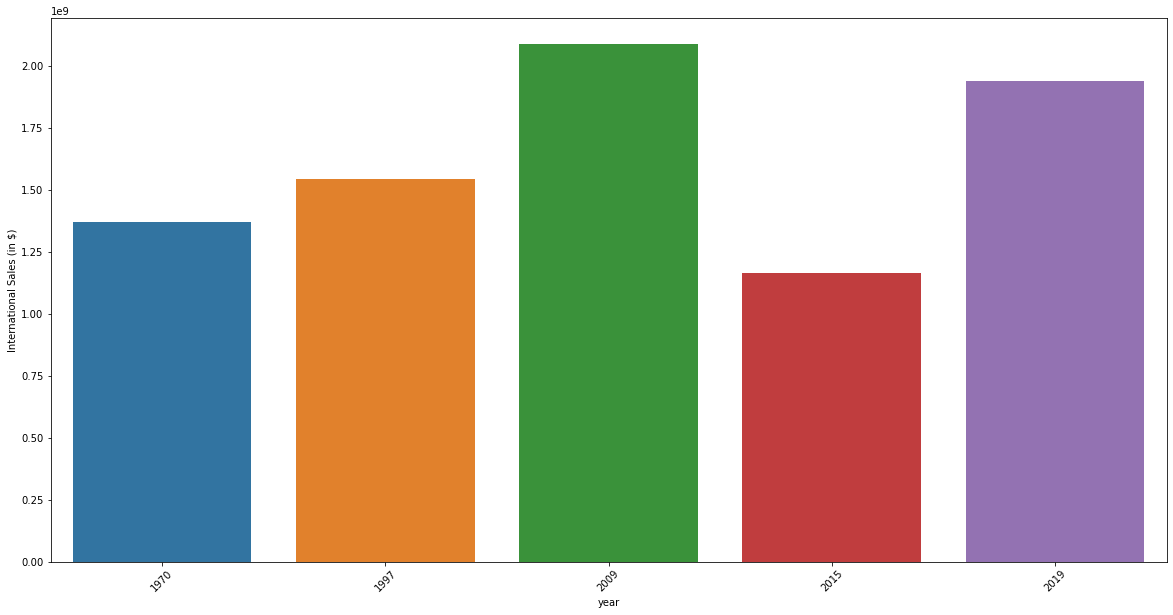

In [51]:
plt.figure(figsize=(20,10))
sns.barplot(x='year',y='International Sales (in $)',data=df_movies_data.nlargest(5, 'International Sales (in $)'))
plt.xticks(rotation=45)
plt.show()

# Top 5 Movies got more world sales

<Figure size 1440x720 with 0 Axes>

<AxesSubplot:xlabel='Title', ylabel='World Sales (in $)'>

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Avatar (2009)'),
  Text(1, 0, 'Avengers: Endgame (2019)'),
  Text(2, 0, 'Titanic (1997)'),
  Text(3, 0, 'Star Wars: Episode VII - The Force Awakens (2015)'),
  Text(4, 0, 'Avengers: Infinity War (2018)')])

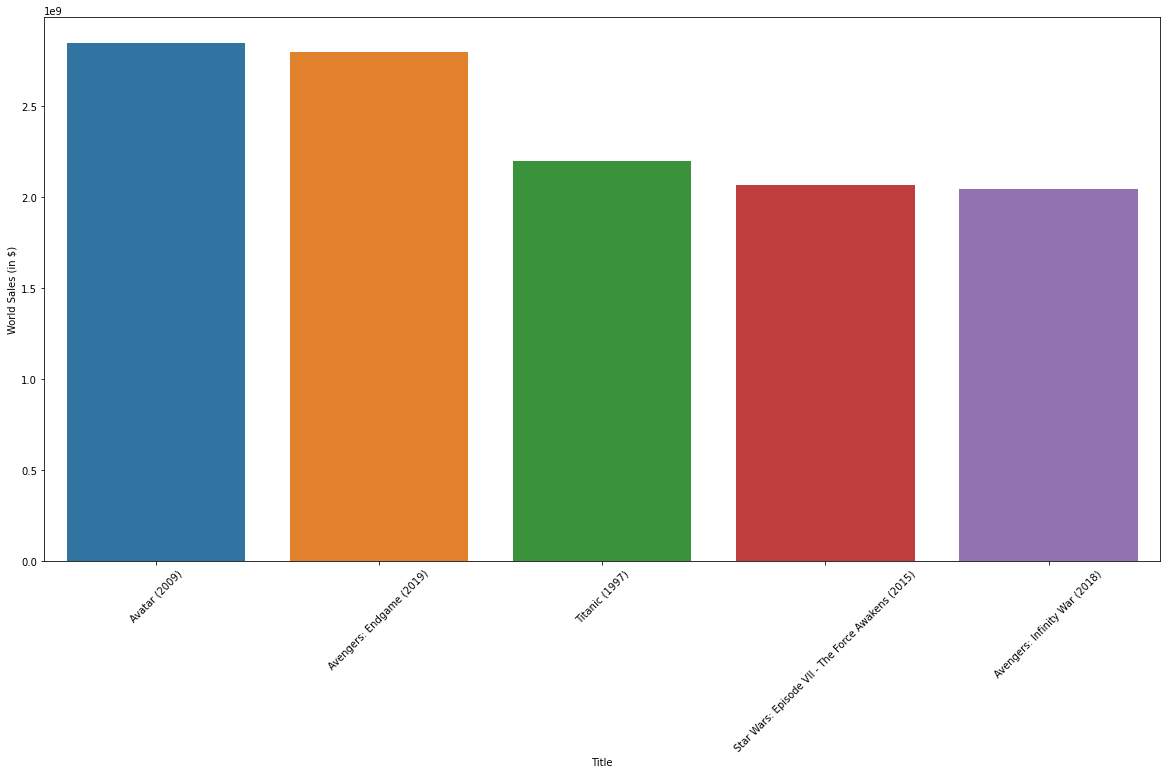

In [52]:
plt.figure(figsize=(20,10))
sns.barplot(x='Title',y='World Sales (in $)',data=df_movies_data.nlargest(5, 'World Sales (in $)'))
plt.xticks(rotation=45)
plt.show()

# Top 5 movies got more domestic sales

<Figure size 1440x720 with 0 Axes>

<AxesSubplot:xlabel='Title', ylabel='Domestic Sales (in $)'>

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Star Wars: Episode VII - The Force Awakens (2015)'),
  Text(1, 0, 'Avengers: Endgame (2019)'),
  Text(2, 0, 'Avatar (2009)'),
  Text(3, 0, 'Black Panther (2018)'),
  Text(4, 0, 'Avengers: Infinity War (2018)')])

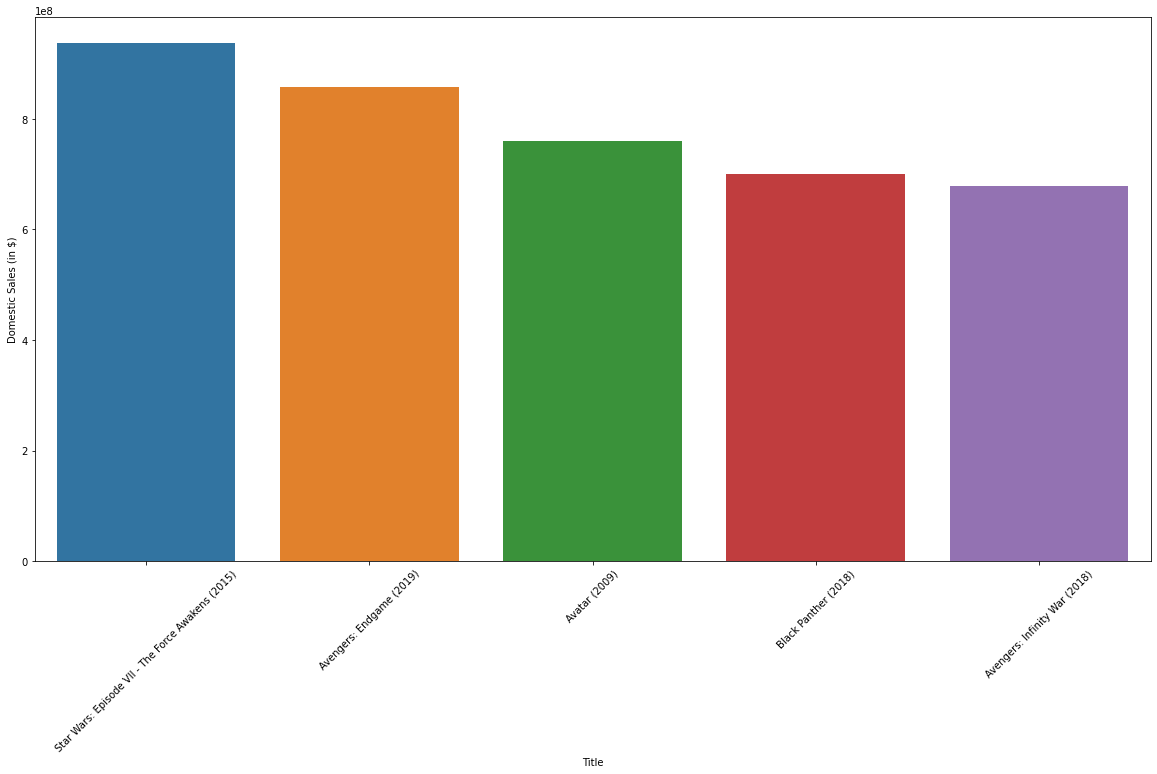

In [53]:
plt.figure(figsize=(20,10))
sns.barplot(x='Title',y='Domestic Sales (in $)',data=df_movies_data.nlargest(5, 'Domestic Sales (in $)'))
plt.xticks(rotation=45)
plt.show()

# Top 5 movies got more international sales

<Figure size 1440x720 with 0 Axes>

<AxesSubplot:xlabel='Title', ylabel='International Sales (in $)'>

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Avatar (2009)'),
  Text(1, 0, 'Avengers: Endgame (2019)'),
  Text(2, 0, 'Titanic (1997)'),
  Text(3, 0, 'Avengers: Infinity War (2018)'),
  Text(4, 0, 'Furious 7 (2015)')])

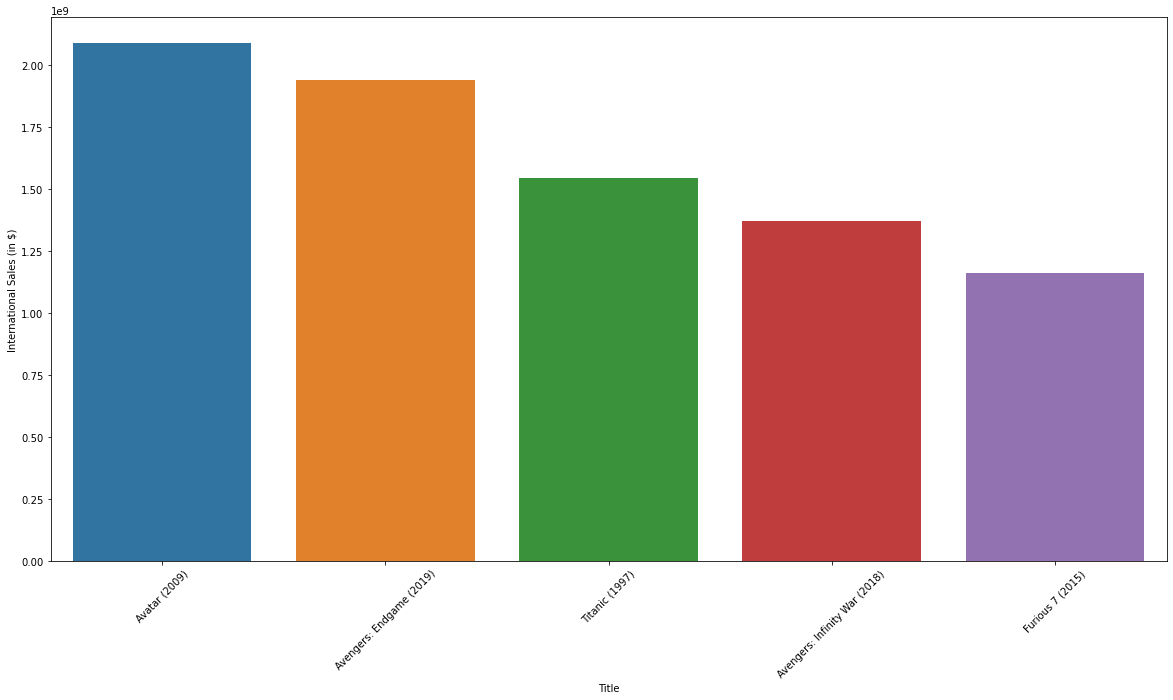

In [54]:
plt.figure(figsize=(20,10))
sns.barplot(x='Title',y='International Sales (in $)',data=df_movies_data.nlargest(5, 'International Sales (in $)'))
plt.xticks(rotation=45)
plt.show()

# Top Distributors According to the international sales

<Figure size 1440x720 with 0 Axes>

<AxesSubplot:xlabel='Distributor', ylabel='International Sales (in $)'>

(array([0, 1, 2, 3]),
 [Text(0, 0, 'Twentieth Century Fox'),
  Text(1, 0, 'Walt Disney Studios Motion Pictures'),
  Text(2, 0, 'Paramount Pictures'),
  Text(3, 0, 'Universal Pictures')])

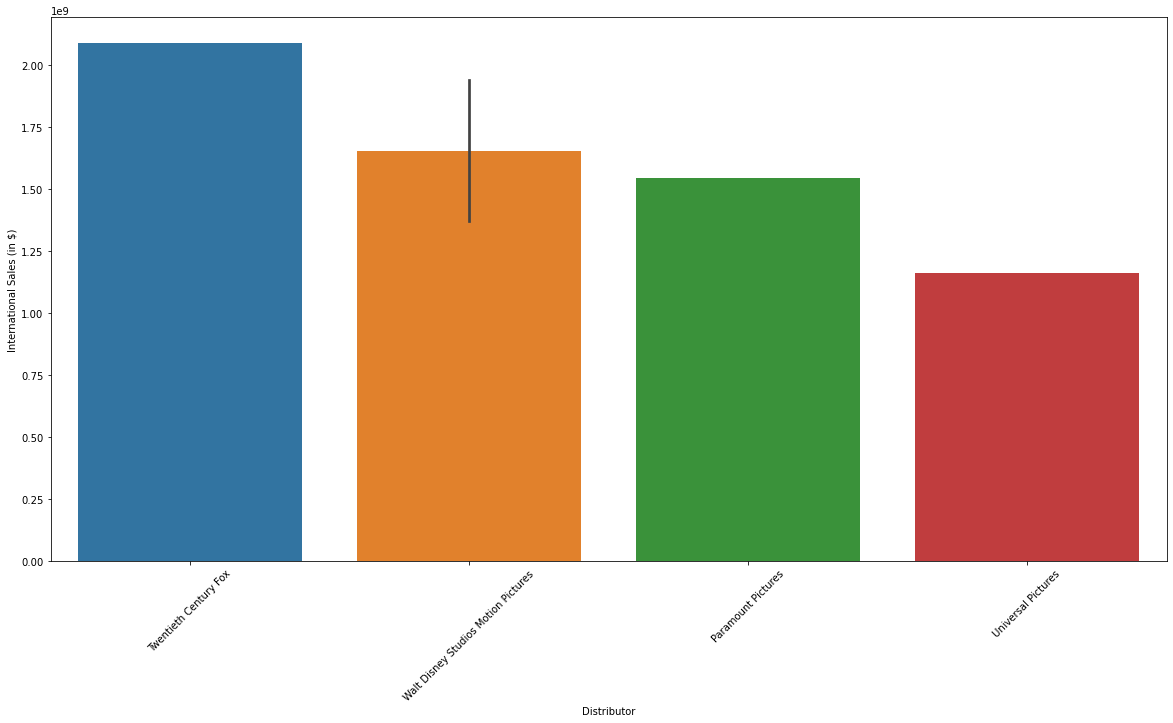

In [55]:
plt.figure(figsize=(20,10))
sns.barplot(x='Distributor',y='International Sales (in $)',data=df_movies_data.nlargest(5, 'International Sales (in $)'))
plt.xticks(rotation=45)
plt.show()

# Top Distributors According to the Domestic sales

<Figure size 1440x720 with 0 Axes>

<AxesSubplot:xlabel='Distributor', ylabel='Domestic Sales (in $)'>

(array([0, 1]),
 [Text(0, 0, 'Walt Disney Studios Motion Pictures'),
  Text(1, 0, 'Twentieth Century Fox')])

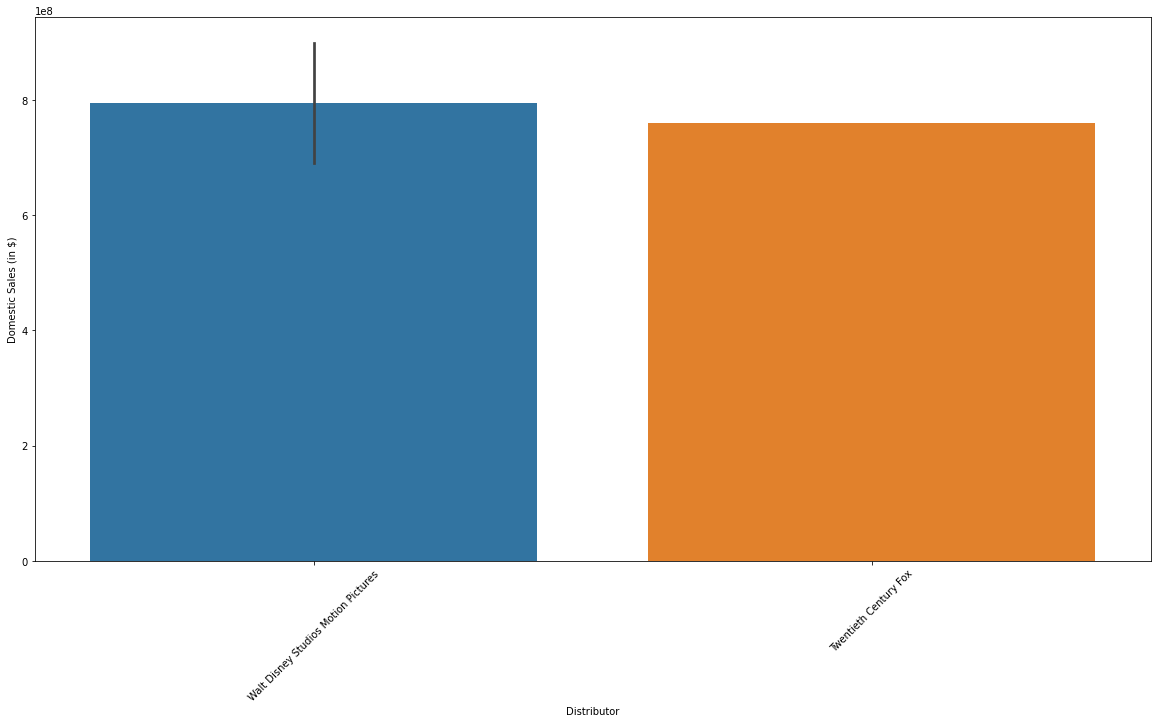

In [56]:
plt.figure(figsize=(20,10))
sns.barplot(x='Distributor',y='Domestic Sales (in $)',data=df_movies_data.nlargest(5, 'Domestic Sales (in $)'))
plt.xticks(rotation=45)
plt.show()

# Top Distributors According to the world sales

<Figure size 1440x720 with 0 Axes>

<AxesSubplot:xlabel='Distributor', ylabel='World Sales (in $)'>

(array([0, 1, 2]),
 [Text(0, 0, 'Twentieth Century Fox'),
  Text(1, 0, 'Walt Disney Studios Motion Pictures'),
  Text(2, 0, 'Paramount Pictures')])

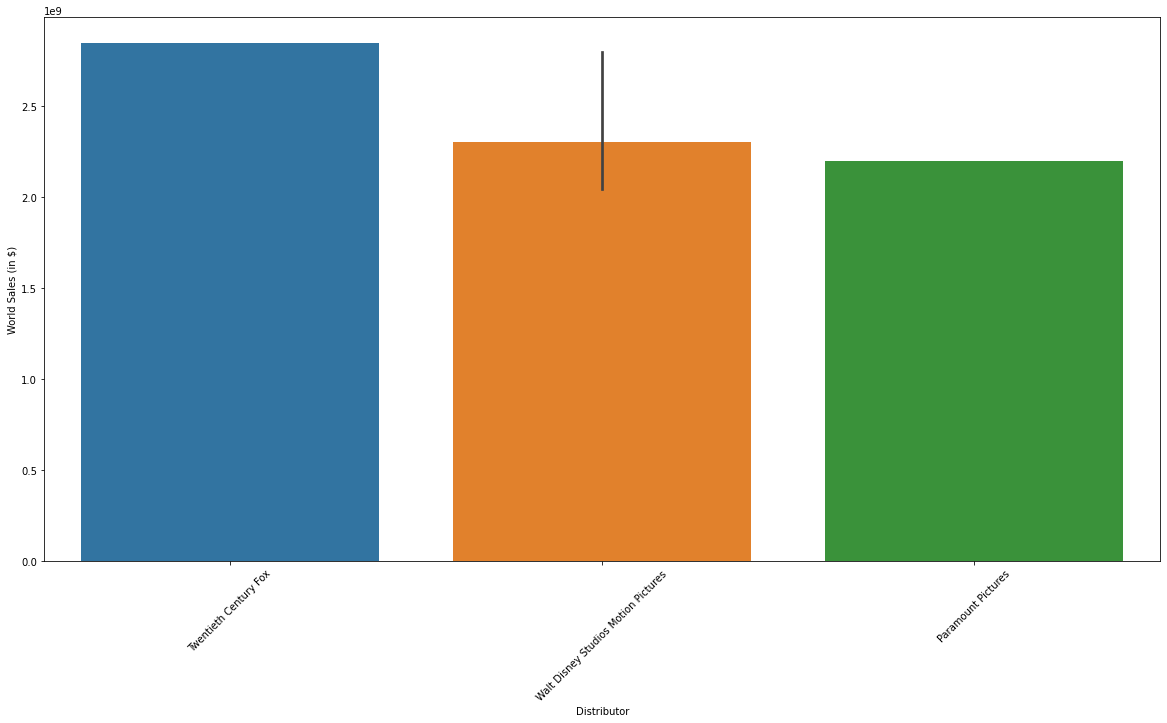

In [57]:
plt.figure(figsize=(20,10))
sns.barplot(x='Distributor',y='World Sales (in $)',data=df_movies_data.nlargest(5, 'World Sales (in $)'))
plt.xticks(rotation=45)
plt.show()

# Movies according to the distributors

<Figure size 720x360 with 0 Axes>

<AxesSubplot:>

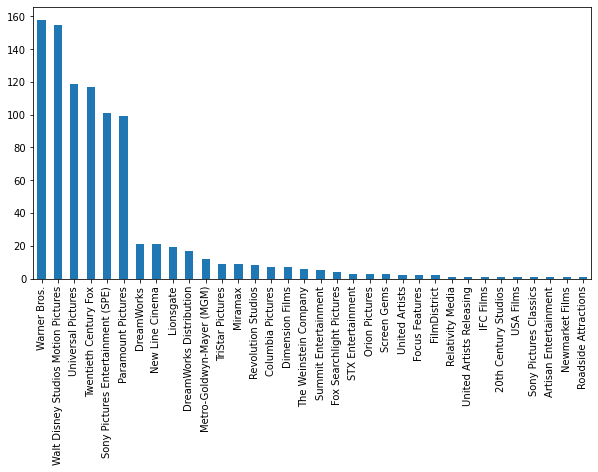

In [58]:
plt.figure(figsize=(10,5))
df_movies_data['Distributor'].value_counts().plot(kind='bar')


In [59]:
df_movies_data.columns

Index(['Title', 'Movie Info', 'Distributor', 'Release Date',
       'Domestic Sales (in $)', 'International Sales (in $)',
       'World Sales (in $)', 'Genre', 'Movie Runtime', 'License',
       'Movie_Runtime_hours', 'Movie_Runtime_total_time', 'year'],
      dtype='object')

In [60]:
top10_len=df_movies_data.nlargest(10,'Movie_Runtime_total_time')[['Title','Movie_Runtime_total_time']].set_index('Title')

In [61]:
top10_len

,Movie_Runtime_total_time
Title,
The Lord of the Rings: The Return of the King (2003),201
Schindler's List (1993),195
Titanic (1997),194
The Green Mile (1999),189
King Kong (2005),187
Pearl Harbor (2001),183
Avengers: Endgame (2019),181
Dances with Wolves (1990),181
The Wolf of Wall Street (2013),180


# Movies that have more run time

<AxesSubplot:xlabel='Movie_Runtime_total_time', ylabel='Title'>

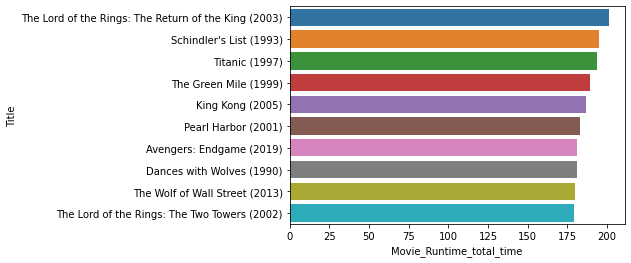

In [62]:
sns.barplot(x='Movie_Runtime_total_time',y=top10_len.index,data=top10_len)

# According to the above plot  Lord of the rings which was released in 2003 is lengthy.

In [63]:
#df_movies_data['year'].value_counts()

In [64]:
df_movies_data.columns

Index(['Title', 'Movie Info', 'Distributor', 'Release Date',
       'Domestic Sales (in $)', 'International Sales (in $)',
       'World Sales (in $)', 'Genre', 'Movie Runtime', 'License',
       'Movie_Runtime_hours', 'Movie_Runtime_total_time', 'year'],
      dtype='object')

In [65]:
df_movies_data_high_int=df_movies_data[df_movies_data['International Sales (in $)'].max()==df_movies_data['International Sales (in $)']]

In [66]:
df_movies_data_high_int['Title']

2    Avatar (2009)
Name: Title, dtype: object

# Avatar(2009)is the highest collected international sales.

In [67]:
df_movies_data_high_dom=df_movies_data[df_movies_data['Domestic Sales (in $)'].max()==df_movies_data['Domestic Sales (in $)']]

In [68]:
df_movies_data_high_world=df_movies_data[df_movies_data['World Sales (in $)'].max()==df_movies_data['World Sales (in $)']]

In [69]:
df_movies_data_high_dom['Title']

0    Star Wars: Episode VII - The Force Awakens (2015)
Name: Title, dtype: object

# Star Wars: Episode VII - The Force Awakens (2015) is the highest domestic sales collected movie

In [70]:
df_movies_data_high_world['Title']

2    Avatar (2009)
Name: Title, dtype: object

# Avatar (2009)is highest world sales collected movie

In [71]:
!pip install neattext

In [72]:
import neattext.functions as nfx

In [73]:
df_movies_data.columns

Index(['Title', 'Movie Info', 'Distributor', 'Release Date',
       'Domestic Sales (in $)', 'International Sales (in $)',
       'World Sales (in $)', 'Genre', 'Movie Runtime', 'License',
       'Movie_Runtime_hours', 'Movie_Runtime_total_time', 'year'],
      dtype='object')

In [74]:
df_movies_data['Genre']=df_movies_data['Genre'].apply(lambda x: nfx.remove_multiple_spaces(x))

In [75]:

df_movies_data['Genre']=df_movies_data['Genre'].apply(lambda x: nfx.remove_bad_quotes(x))

In [76]:
df_movies_data['Genre'].dtype

dtype('O')

In [77]:
df_movies_data['Genre'].value_counts()

['Action', 'Adventure', 'Sci-Fi']                       56
['Comedy']                                              35
['Comedy', 'Romance']                                   30
['Action', 'Adventure', 'Thriller']                     28
['Action', 'Crime', 'Thriller']                         23
                                                        ..
['Biography', 'Comedy', 'Drama', 'Romance']              1
['Drama', 'History']                                     1
['Drama', 'Family']                                      1
['Action', 'Crime', 'Mystery', 'Sci-Fi', 'Thriller']     1
['Comedy', 'Family', 'Fantasy', 'Romance']               1
Name: Genre, Length: 309, dtype: int64

In [78]:
list1=[]
dict1={}
df_genre_sci=df_movies_data[df_movies_data['Genre'].str.contains('Sci-Fi',case=False)]
#len(df_genre_action)
list1.append(len(df_genre_sci))
dict1['Sci-Fi']=len(df_genre_sci)
df_genre_thriller=df_movies_data[df_movies_data['Genre'].str.contains('Thriller',case=False)]
#len(df_genre_action)
list1.append(len(df_genre_thriller))
dict1['Thriller']=len(df_genre_thriller)
df_genre_Fantasy=df_movies_data[df_movies_data['Genre'].str.contains('Fantasy',case=False)]
#len(df_genre_adv)
list1.append(len(df_genre_Fantasy))
dict1['Fantasy']=len(df_genre_Fantasy)
#print(list1)
#print(dict1)
df_genre_action=df_movies_data[df_movies_data['Genre'].str.contains('Action',case=False)]
#len(df_genre_action)
list1.append(len(df_genre_action))
dict1['Action']=len(df_genre_action)
print(dict1)
df_genre_Mystery=df_movies_data[df_movies_data['Genre'].str.contains('Mystery',case=False)]
#len(df_genre_adv)
list1.append(len(df_genre_Mystery))
dict1['Mystery']=len(df_genre_Mystery)
print(dict1)
#print(list1)
df_genre_adv=df_movies_data[df_movies_data['Genre'].str.contains('Adventure',case=False)]
#len(df_genre_adv)
list1.append(len(df_genre_adv))
dict1['Adventure']=len(df_genre_adv)
#print(dict1)
#print(list1)
df_genre_comedy=df_movies_data[df_movies_data['Genre'].str.contains('Comedy',case=False)]
#len(df_genre_adv)
list1.append(len(df_genre_comedy))
dict1['Comedy']=len(df_genre_comedy)
#print(dict1)
#print(list1)
df_genre_family=df_movies_data[df_movies_data['Genre'].str.contains('Family',case=False)]
#len(df_genre_adv)
list1.append(len(df_genre_family))
dict1['Family']=len(df_genre_family)
print(dict1)
#print(list1)

{'Sci-Fi': 228, 'Thriller': 230, 'Fantasy': 227, 'Action': 396}
{'Sci-Fi': 228, 'Thriller': 230, 'Fantasy': 227, 'Action': 396, 'Mystery': 87}
{'Sci-Fi': 228, 'Thriller': 230, 'Fantasy': 227, 'Action': 396, 'Mystery': 87, 'Adventure': 432, 'Comedy': 399, 'Family': 227}


In [79]:
data_items = dict1.items()
data_list = list(data_items)
df_g = pd.DataFrame(data_list,columns=['Genre','count'])

In [80]:
#df_g.set_index('Genre')
df_g

,Genre,count
0,Sci-Fi,228
1,Thriller,230
2,Fantasy,227
3,Action,396
4,Mystery,87
5,Adventure,432
6,Comedy,399
7,Family,227


Text(0.5, 0, 'Genre')

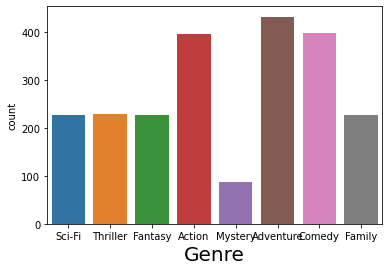

In [81]:
p=sns.barplot(y='count',x='Genre',data=df_g)
p.set_xlabel("Genre", fontsize = 20)


<Figure size 1440x720 with 0 Axes>

<AxesSubplot:xlabel='Genre', ylabel='count'>

(array([0, 1, 2, 3, 4, 5, 6, 7]),
 [Text(0, 0, 'Sci-Fi'),
  Text(1, 0, 'Thriller'),
  Text(2, 0, 'Fantasy'),
  Text(3, 0, 'Action'),
  Text(4, 0, 'Mystery'),
  Text(5, 0, 'Adventure'),
  Text(6, 0, 'Comedy'),
  Text(7, 0, 'Family')])

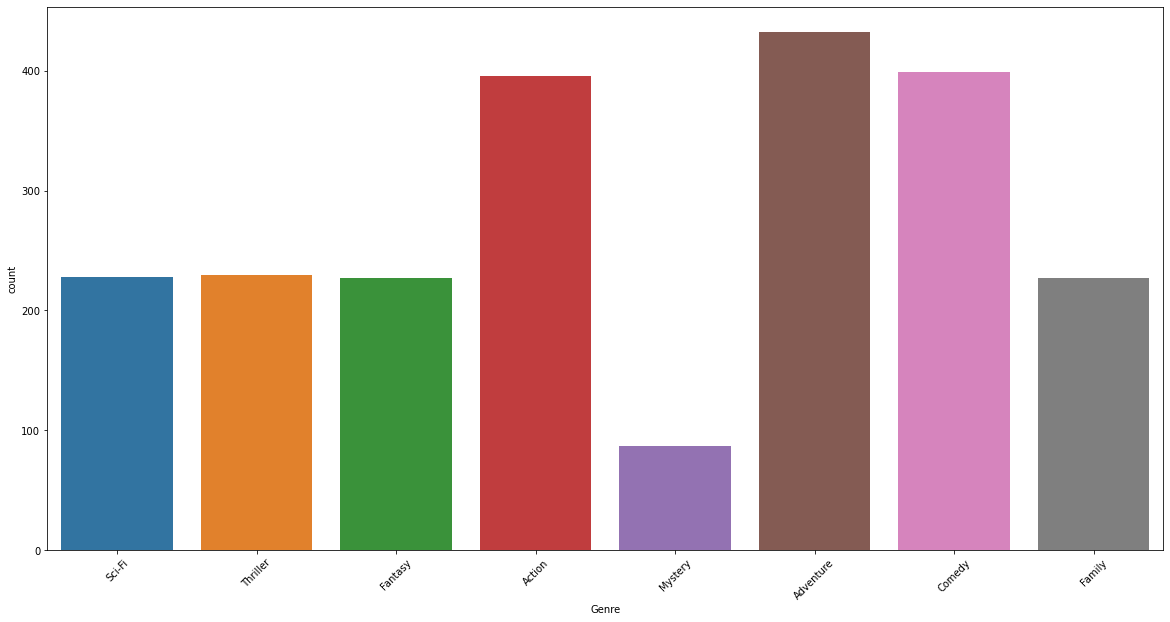

In [82]:
plt.figure(figsize=(20,10))
sns.barplot(x='Genre',y='count',data=df_g)
plt.xticks(rotation=45)
plt.show()

# #More Adventure Movies